In [1]:
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup

# Install selenium because we are dealing with Javascript encoded website for players data

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from sklearn.preprocessing import StandardScaler

driver = webdriver.Chrome(ChromeDriverManager().install())

/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_18865/2620057919.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


## Data Extraction

In [2]:
# We will webscrape our data from 

player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"
url = player_stats_url.format(2022)
data = requests.get(url)
with open("player/2022.html", "w+") as f:
    f.write(data.text)

In [3]:
import time

year = 2022
url = player_stats_url.format(year)

driver.get(url)
driver.execute_script("window.scrollTo(1,10000)") # Java script windowscroll - scroll the page down and grab the data 
time.sleep(2)

html= driver.page_source

with open ("player/{}.html".format(year), "w+") as f: 
    f.write(html)

In [4]:
year= 2022

with open("player/{}.html".format(year)) as f:
    page = f.read()
soup = BeautifulSoup(page, "html.parser")
soup.find('tr', class_ = "thead").decompose()
player_table = soup.find(id="per_game_stats")
player_1 = pd.read_html(str(player_table))[0]
player_1["Year"] = year



In [5]:
player_1.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2022
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2022
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2022
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2022
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2022


In [6]:
player_1

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2022
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2022
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2022
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2022
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [7]:
player_1.to_csv("players_2022.csv")

In [8]:
player = pd.read_csv("players_2022.csv")

In [9]:
player["Player"].head(20)

0             Precious Achiuwa
1                 Steven Adams
2                  Bam Adebayo
3                 Santi Aldama
4            LaMarcus Aldridge
5     Nickeil Alexander-Walker
6     Nickeil Alexander-Walker
7     Nickeil Alexander-Walker
8                Grayson Allen
9                Jarrett Allen
10               Jose Alvarado
11             Justin Anderson
12             Justin Anderson
13             Justin Anderson
14               Kyle Anderson
15       Giannis Antetokounmpo
16      Thanasis Antetokounmpo
17             Carmelo Anthony
18                Cole Anthony
19                  OG Anunoby
Name: Player, dtype: object

## Data Cleaning

In [10]:
del player["Rk"]

In [11]:
player[player["Pos"]== "SG-PG-SF"]

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
674,674,Tomáš Satoranský,SG-PG-SF,30,TOT,55,13,16.5,1.3,3.5,...,0.5,1.8,2.3,3.3,0.5,0.1,0.8,1.3,3.6,2022


In [12]:
# Convert mixed positions, like "C-PF" and "PF-SF" into one of the 5 main basketball positions:
player = player.replace("C-PF","C")
player = player.replace("PF-SF","PF")
player = player.replace("SF-SG","SF")
player = player.replace("SG-PG","SG")
player = player.replace("PF-C","PF")
player = player.replace("PG-SG","PG")
player = player.replace("SF-PF","SF")
player = player.replace("SG-SF","SG")
player = player.replace("SG-PF","SG")
player = player.replace("SG-PG-SF", "SG")

In [13]:
#We need to iterate through each group and make sure that every player only has one row

player.groupby(["Player", "Year"]).get_group(("Nickeil Alexander-Walker", 2022))

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
5,5,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,2022
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,...,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8,2022
7,7,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,...,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5,2022


In [14]:
#Dealing duplicate rows

def single_row(df):
    if df.shape[0]==1:    #If there's only one row for that specific player return the data
        return df
    else:
        row = df[df["Tm"] == "TOT"]       #If they have multiple teams they payed for just return their total stats (TOT)
        row["Tm"] = df.iloc[-1,:]["Tm"]   #replace TOT with the last team that player played for in the last row
        return row
    
player = player.groupby(["Player", "Year"]).apply(single_row) #Apply the function above to each group

In [15]:
player

,,,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Player,Year,,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,2022,268,268,Aaron Gordon,PF,26,DEN,75,75,31.7,5.8,11.1,...,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,2022
Aaron Henry,2022,313,313,Aaron Henry,SF,22,PHI,6,0,2.8,0.2,0.8,...,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3,2022
Aaron Holiday,2022,332,332,Aaron Holiday,PG,25,PHO,63,15,16.2,2.4,5.4,...,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,2022
Aaron Nesmith,2022,567,567,Aaron Nesmith,SF,22,BOS,52,3,11.0,1.4,3.5,...,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,2022
Aaron Wiggins,2022,809,809,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,...,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach LaVine,2022,457,457,Zach LaVine,SG,26,CHI,67,67,34.7,8.4,17.7,...,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4,2022
Zavier Simpson,2022,697,697,Zavier Simpson,PG,24,OKC,4,4,43.5,4.8,13.0,...,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0,2022
Zeke Nnaji,2022,572,572,Zeke Nnaji,PF,21,DEN,41,1,17.0,2.3,4.5,...,1.4,2.2,3.6,0.4,0.4,0.3,0.6,1.9,6.6,2022


In [16]:
player[player["Player"]=="Nickeil Alexander-Walker"]

,,,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Player,Year,,,,,,,,,,,,,,,,,,,,,,
Nickeil Alexander-Walker,2022,5,5,Nickeil Alexander-Walker,SG,23,UTA,65,21,22.6,3.9,10.5,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,2022


In [17]:
#Drop the columns not needed at the index level 

player.index = player.index.droplevel() 

In [18]:
player

Unnamed: 0           Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Year                                                                          
2022 268         268     Aaron Gordon  PF  26  DEN  75  75  31.7  5.8  11.1   
     313         313      Aaron Henry  SF  22  PHI   6   0   2.8  0.2   0.8   
     332         332    Aaron Holiday  PG  25  PHO  63  15  16.2  2.4   5.4   
     567         567    Aaron Nesmith  SF  22  BOS  52   3  11.0  1.4   3.5   
     809         809    Aaron Wiggins  SG  23  OKC  50  35  24.2  3.1   6.7   
...              ...              ...  ..  ..  ...  ..  ..   ...  ...   ...   
     457         457      Zach LaVine  SG  26  CHI  67  67  34.7  8.4  17.7   
     697         697   Zavier Simpson  PG  24  OKC   4   4  43.5  4.8  13.0   
     572         572       Zeke Nnaji  PF  21  DEN  41   1  17.0  2.3   4.5   
     818         818  Ziaire Williams  SF  20  MEM  62  31  21.7  3.1   6.8   
     130         130   Zylan Cheatham  SF  26  UTA   1   0   5.0  0.0   3.0   

          ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
Year      ...                                                      
2022 268  ...  1.7  4.2  5.9  2.5  0.6  0.6  1.8  2.0  15.0  2022  
     313  ...  0.0  0.2  0.2  0.0  0.0  0.3  0.3  0.3   0.3  2022  
     332  ...  0.4  1.6  1.9  2.4  0.7  0.1  1.1  1.5   6.3  2022  
     567  ...  0.3  1.4  1.7  0.4  0.4  0.1  0.6  1.3   3.8  2022  
     809  ...  1.0  2.5  3.6  1.4  0.6  0.2  1.1  1.9   8.3  2022  
...       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  
     457  ...  0.3  4.3  4.6  4.5  0.6  0.3  2.6  1.8  24.4  2022  
     697  ...  0.5  4.8  5.3  7.5  1.3  1.0  2.5  3.8  11.0  2022  
     572  ...  1.4  2.2  3.6  0.4  0.4  0.3  0.6  1.9   6.6  2022  
     818  ...  0.4  1.7  2.1  1.0  0.6  0.2  0.7  1.8   8.1  2022  
     130  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  2022  

[605 rows x 31 columns]

In [19]:
#We are going to run this function twice since we had two index and we still have the year index present

player.index = player.index.droplevel() 

In [20]:
player

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
268,268,Aaron Gordon,PF,26,DEN,75,75,31.7,5.8,11.1,...,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,2022
313,313,Aaron Henry,SF,22,PHI,6,0,2.8,0.2,0.8,...,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3,2022
332,332,Aaron Holiday,PG,25,PHO,63,15,16.2,2.4,5.4,...,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,2022
567,567,Aaron Nesmith,SF,22,BOS,52,3,11.0,1.4,3.5,...,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,2022
809,809,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,...,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,457,Zach LaVine,SG,26,CHI,67,67,34.7,8.4,17.7,...,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4,2022
697,697,Zavier Simpson,PG,24,OKC,4,4,43.5,4.8,13.0,...,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0,2022
572,572,Zeke Nnaji,PF,21,DEN,41,1,17.0,2.3,4.5,...,1.4,2.2,3.6,0.4,0.4,0.3,0.6,1.9,6.6,2022
818,818,Ziaire Williams,SF,20,MEM,62,31,21.7,3.1,6.8,...,0.4,1.7,2.1,1.0,0.6,0.2,0.7,1.8,8.1,2022


In [21]:
player[player["Player"]=="Nickeil Alexander-Walker"]

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
5,5,Nickeil Alexander-Walker,SG,23,UTA,65,21,22.6,3.9,10.5,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,2022


In [22]:
del player["Unnamed: 0"]

In [23]:
player

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
268,Aaron Gordon,PF,26,DEN,75,75,31.7,5.8,11.1,.520,...,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,2022
313,Aaron Henry,SF,22,PHI,6,0,2.8,0.2,0.8,.200,...,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3,2022
332,Aaron Holiday,PG,25,PHO,63,15,16.2,2.4,5.4,.447,...,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,2022
567,Aaron Nesmith,SF,22,BOS,52,3,11.0,1.4,3.5,.396,...,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,2022
809,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,.463,...,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Zach LaVine,SG,26,CHI,67,67,34.7,8.4,17.7,.476,...,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4,2022
697,Zavier Simpson,PG,24,OKC,4,4,43.5,4.8,13.0,.365,...,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0,2022
572,Zeke Nnaji,PF,21,DEN,41,1,17.0,2.3,4.5,.516,...,1.4,2.2,3.6,0.4,0.4,0.3,0.6,1.9,6.6,2022
818,Ziaire Williams,SF,20,MEM,62,31,21.7,3.1,6.8,.450,...,0.4,1.7,2.1,1.0,0.6,0.2,0.7,1.8,8.1,2022


In [24]:
player.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        9
3P         0
3PA        0
3P%       44
2P         0
2PA        0
2P%       16
eFG%       9
FT         0
FTA        0
FT%       59
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
dtype: int64

In [25]:
#Let's replace the 0 in every columns having missing values

player[["FG%", "3P%", "2P%", "eFG%", "FT%"]] = player[["FG%", "3P%", "2P%", "eFG%", "FT%"]].fillna(0)

In [26]:
player.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Year      0
dtype: int64

In [27]:
player.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Year       int64
dtype: object

In [28]:
player = player.apply(pd.to_numeric, errors = "ignore")

In [29]:
player.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Year        int64
dtype: object

In [30]:
player["Pos"].unique()

array(['PF', 'SF', 'PG', 'SG', 'C'], dtype=object)

In [31]:
player.shape

(605, 30)

In [32]:
#Drop Players who play less than 12 mins/game and 10 games
player = player[(player['MP'] >= 12) & (player['G'] >= 10)]
player.reset_index(drop = True, inplace = True)
player.shape

(405, 30)

We reduced our data from 605 to 405

## Data Visualization

In [33]:
# Groupby "position" and calculate average of each column, per position:
summary_df = player.groupby('Pos').mean()
summary_df.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Pos,,,,,,,,,,,,,,,,,,,,,
C,27.105263,56.697368,31.710526,21.838158,3.922368,7.203947,0.550171,0.517105,1.484211,0.250316,...,2.040789,4.628947,6.668421,1.613158,0.605263,0.881579,1.218421,2.300000,10.094737,2022.0
PF,26.653846,57.641026,33.423077,24.243590,4.184615,8.752564,0.478487,1.091026,3.123077,0.326641,...,1.201282,3.948718,5.157692,1.974359,0.724359,0.596154,1.260256,2.088462,11.310256,2022.0
PG,26.717949,52.435897,29.256410,24.620513,4.226923,9.865385,0.419679,1.407692,4.051282,0.328859,...,0.533333,2.724359,3.251282,4.400000,0.916667,0.274359,1.756410,1.793590,11.778205,2022.0
SF,25.410256,56.461538,27.269231,23.165385,3.558974,7.985897,0.442449,1.248718,3.567949,0.343167,...,0.821795,2.930769,3.744872,1.792308,0.721795,0.375641,1.038462,1.805128,9.782051,2022.0
SG,25.589474,60.063158,28.631579,24.638947,4.113684,9.485263,0.432179,1.676842,4.673684,0.351747,...,0.570526,2.604211,3.181053,2.443158,0.798947,0.273684,1.246316,1.783158,11.362105,2022.0


<AxesSubplot:title={'center':'Bar Chart of Main Stats across all 5 Positions'}, xlabel='Pos'>

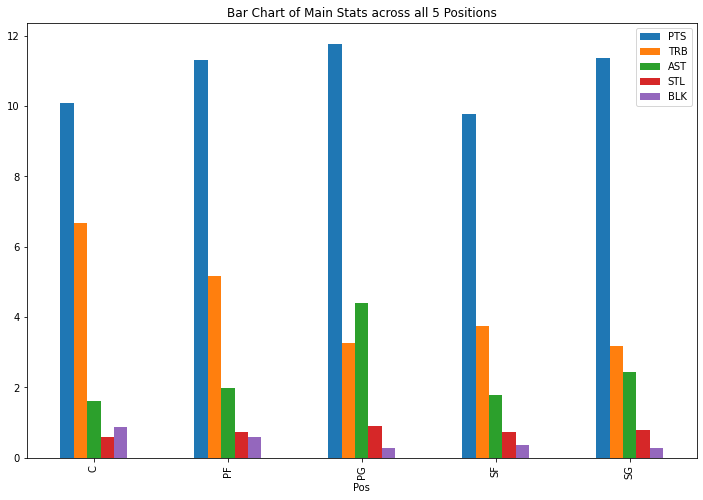

In [34]:
# Visualization 1 of 2:
bar_chart_df = summary_df[['PTS', 'TRB', 'AST', 'STL', 'BLK']]
bar_chart_df.plot(kind='bar', figsize = (12, 8), title='Bar Chart of Main Stats across all 5 Positions')

In [35]:
highest_scoring = player[player["G"] > 55].sort_values("PTS", ascending=False).head(10)
#highest_scoring

<AxesSubplot:xlabel='Player'>

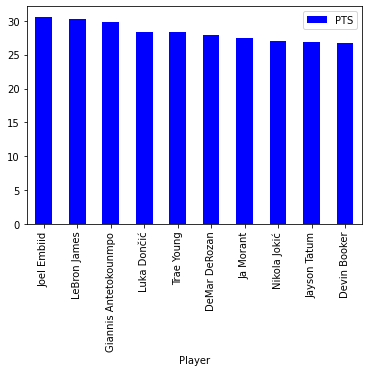

In [36]:
highest_scoring.plot.bar("Player", "PTS", color="blue")

In [37]:
highest_rebounding = player[player["G"] > 55].sort_values("TRB", ascending=False).head(10)
#highest_rebounding

<AxesSubplot:xlabel='Player'>

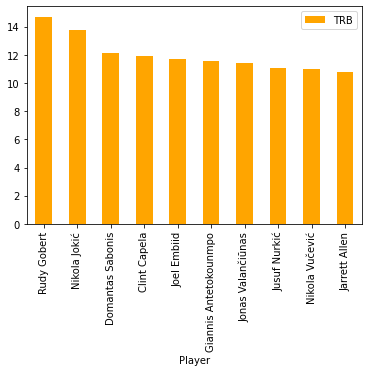

In [38]:
highest_rebounding.plot.bar("Player", "TRB", color="orange")

In [39]:
highest_assist = player[player["G"] > 55].sort_values("AST", ascending=False).head(10)
#highest_assist

<AxesSubplot:xlabel='Player'>

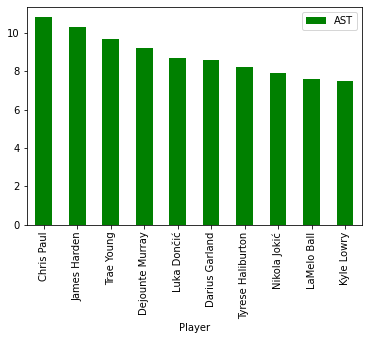

In [40]:
highest_assist.plot.bar("Player", "AST", color="green")

Text(0.5, 1.0, 'Variation in Total Steals')

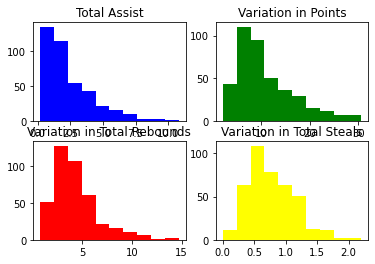

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.subplot(2,2,1)

plt.hist(player['AST'], bins = 10, color="blue")
plt.title('Total Assist')

plt.subplot(2,2,2)

plt.hist(player['PTS'], bins = 10, color="green")
plt.title('Variation in Points')

plt.subplot(2,2,3)

plt.hist(player['TRB'], bins = 10, color="red")
plt.title('Variation in Total Rebounds')

plt.subplot(2,2,4)

plt.hist(player['STL'], bins = 10, color="yellow")
plt.title('Variation in Total Steals')

## Features Selection 

In [42]:
# looking at our categorical columns

player.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [43]:
# We are dropping our categorical columns 

features = [ 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [44]:
#The code below states that drop any rows where one of these columns has a null or missing value
#Most clustering are not able to work with missing values

player = player.dropna(subset=features)

In [45]:
# Let's put our features in a dataframe

df = player[features].copy()

In [46]:
df.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5.8,11.1,0.520,1.2,3.5,0.335,4.6,7.7,0.605,0.573,...,0.743,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0
1,2.4,5.4,0.447,0.6,1.6,0.379,1.8,3.7,0.477,0.504,...,0.868,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
2,3.1,6.7,0.463,0.8,2.8,0.304,2.3,4.0,0.573,0.525,...,0.729,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3
3,1.4,3.4,0.419,0.7,2.1,0.329,0.7,1.3,0.560,0.519,...,0.800,0.4,1.9,2.3,0.7,0.1,0.1,0.6,1.5,3.8
4,3.9,8.2,0.467,1.3,3.8,0.336,2.6,4.4,0.582,0.546,...,0.842,1.6,6.1,7.7,3.4,0.7,1.3,0.9,1.9,10.2


## Scaling our data using Min Max

In [47]:
df.describe()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,4.006420,8.700494,0.462810,1.212099,3.443704,0.321817,2.794568,5.257531,0.528909,0.531822,...,0.763891,1.009136,3.329136,4.338272,2.448642,0.756049,0.469630,1.301975,1.945185,10.890123
std,2.131984,4.516313,0.074389,0.875535,2.286398,0.102086,1.808018,3.310264,0.073834,0.058456,...,0.105662,0.771838,1.738823,2.297134,1.893535,0.358965,0.392619,0.816474,0.615161,5.968270
min,1.000000,1.300000,0.301000,0.000000,0.000000,0.000000,0.400000,0.600000,0.271000,0.378000,...,0.250000,0.100000,0.700000,0.800000,0.200000,0.000000,0.000000,0.200000,0.400000,2.200000
25%,2.400000,5.200000,0.412000,0.500000,1.800000,0.303000,1.500000,3.000000,0.480000,0.496000,...,0.708000,0.500000,2.200000,2.800000,1.100000,0.500000,0.200000,0.800000,1.500000,6.400000
50%,3.400000,7.200000,0.452000,1.000000,3.100000,0.339000,2.300000,4.400000,0.527000,0.530000,...,0.780000,0.700000,2.900000,3.900000,1.900000,0.700000,0.400000,1.000000,1.900000,9.100000
75%,5.100000,11.100000,0.497000,1.800000,5.000000,0.376000,3.500000,6.700000,0.573000,0.564000,...,0.842000,1.400000,4.000000,5.300000,3.300000,0.900000,0.600000,1.600000,2.400000,14.100000
max,11.400000,21.800000,0.761000,4.500000,11.700000,1.000000,9.500000,18.300000,0.761000,0.761000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.200000,2.800000,4.500000,3.700000,30.600000


In [48]:
df = ((df - df.min()) / (df.max() - df.min())) * 9 + 1

In [49]:
df.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5.153846,5.302439,5.284783,3.4,3.692308,4.015,5.153846,4.610169,7.134694,5.582245,...,6.916,4.2,4.058252,4.302158,2.952830,3.454545,2.928571,4.348837,5.363636,5.056338
1,2.211538,2.800000,3.856522,2.2,2.230769,4.411,2.384615,2.576271,4.783673,3.960836,...,8.416,1.6,1.786408,1.712230,2.867925,3.863636,1.321429,2.883721,4.000000,2.299296
2,2.817308,3.370732,4.169565,2.6,3.153846,3.736,2.879121,2.728814,6.546939,4.454308,...,6.748,2.8,2.572816,2.812950,2.018868,3.454545,1.642857,2.883721,5.090909,2.933099
3,1.346154,1.921951,3.308696,2.4,2.615385,3.961,1.296703,1.355932,6.308163,4.313316,...,7.600,1.6,2.048544,1.971223,1.424528,1.409091,1.321429,1.837209,4.000000,1.507042
4,3.509615,4.029268,4.247826,3.6,3.923077,4.024,3.175824,2.932203,6.712245,4.947781,...,8.104,4.0,5.718447,5.467626,3.716981,3.863636,5.178571,2.465116,5.090909,3.535211


In [50]:
df.describe()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.601709,4.248997,4.165845,3.424198,3.649003,3.896356,3.368254,3.368236,5.737098,4.614621,...,7.166696,2.818272,3.297303,3.290967,2.909224,4.092929,2.509524,3.306460,5.214141,3.753912
std,1.844986,1.982771,1.455444,1.751070,1.758768,0.918775,1.788150,1.683185,1.356139,1.373646,...,1.267941,1.543675,1.519360,1.487353,1.607718,1.468492,1.261989,1.708899,1.677713,1.891353
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.211538,2.712195,3.171739,2.000000,2.384615,3.727000,2.087912,2.220339,4.838776,3.772846,...,6.496000,1.800000,2.310680,2.294964,1.764151,3.045455,1.642857,2.255814,4.000000,2.330986
50%,3.076923,3.590244,3.954348,3.000000,3.384615,4.051000,2.879121,2.932203,5.702041,4.571802,...,7.360000,2.200000,2.922330,3.007194,2.443396,3.863636,2.285714,2.674419,5.090909,3.186620
75%,4.548077,5.302439,4.834783,4.600000,4.846154,4.384000,4.065934,4.101695,6.546939,5.370757,...,8.104000,3.600000,3.883495,3.913669,3.632075,4.681818,2.928571,3.930233,6.454545,4.771127
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [51]:
#X= df
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#X_scaled.max()

#X_scaled

In [52]:
# Let's initiate the centroids 

def random_centroids(df, k):
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [53]:
centroids = random_centroids(df, 5)

In [54]:
centroids

,0,1,2,3,4
FG,2.125000,8.182692,1.951923,3.682692,4.028846
FGA,5.741463,2.887805,2.492683,6.268293,2.536585
FG%,3.876087,2.428261,3.817391,4.013043,3.993478
3P,5.800000,1.000000,6.000000,1.600000,4.800000
3PA,4.000000,6.076923,2.538462,6.000000,3.307692
3P%,1.819000,3.997000,4.159000,4.771000,4.177000
2P,2.978022,3.175824,1.098901,2.582418,3.274725
2PA,4.355932,7.966102,3.084746,3.338983,2.016949
2P%,4.802041,6.216327,4.563265,6.197959,6.712245
eFG%,5.864230,3.890339,4.830287,5.135770,8.872063


In [55]:
#df = df.reset_index()

In [56]:
df

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5.153846,5.302439,5.284783,3.4,3.692308,4.015,5.153846,4.610169,7.134694,5.582245,...,6.916,4.2,4.058252,4.302158,2.952830,3.454545,2.928571,4.348837,5.363636,5.056338
1,2.211538,2.800000,3.856522,2.2,2.230769,4.411,2.384615,2.576271,4.783673,3.960836,...,8.416,1.6,1.786408,1.712230,2.867925,3.863636,1.321429,2.883721,4.000000,2.299296
2,2.817308,3.370732,4.169565,2.6,3.153846,3.736,2.879121,2.728814,6.546939,4.454308,...,6.748,2.8,2.572816,2.812950,2.018868,3.454545,1.642857,2.883721,5.090909,2.933099
3,1.346154,1.921951,3.308696,2.4,2.615385,3.961,1.296703,1.355932,6.308163,4.313316,...,7.600,1.6,2.048544,1.971223,1.424528,1.409091,1.321429,1.837209,4.000000,1.507042
4,3.509615,4.029268,4.247826,3.6,3.923077,4.024,3.175824,2.932203,6.712245,4.947781,...,8.104,4.0,5.718447,5.467626,3.716981,3.863636,5.178571,2.465116,5.090909,3.535211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.692308,2.229268,3.993478,1.4,1.692308,2.836,2.285714,2.322034,5.702041,3.326371,...,5.776,3.2,1.961165,2.424460,1.849057,4.681818,1.964286,1.837209,3.181818,1.823944
401,2.471154,2.843902,4.697826,2.0,2.153846,4.069,2.780220,2.779661,6.014286,4.689295,...,7.600,4.0,3.708738,4.043165,2.698113,3.045455,3.571429,3.930233,6.454545,2.774648
402,7.403846,8.200000,4.423913,6.6,6.461538,4.501,6.241758,6.084746,5.830612,5.135770,...,8.236,1.4,4.145631,3.460432,4.650943,3.454545,1.964286,6.023256,4.818182,8.035211
403,2.125000,2.404878,5.206522,2.8,2.538462,5.167,1.989011,2.016949,6.253061,6.592689,...,5.572,3.6,2.310680,2.812950,1.169811,2.636364,1.964286,1.837209,5.090909,2.394366


In [57]:
#del df["index"]

## Determining how many Clusters is necessary for our analysis 

In [58]:
from sklearn.cluster import KMeans

In [59]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

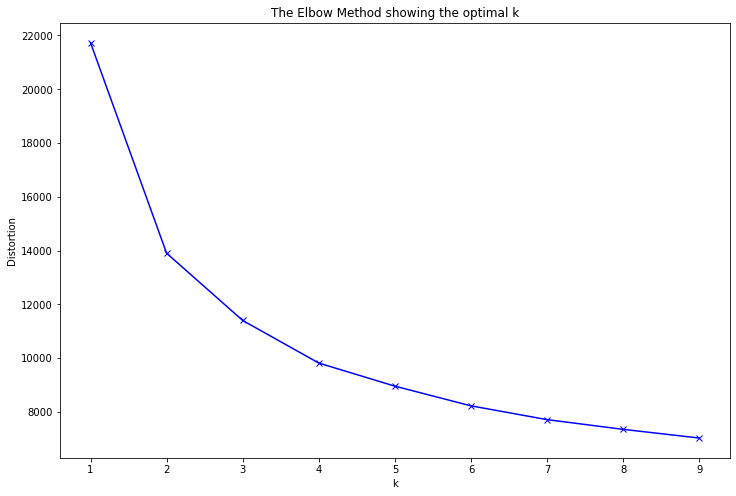

In [60]:
plt.figure(figsize=(12,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Labeling each data point

In [61]:
def get_labels(df, centorids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [62]:
labels = get_labels(df, centroids)

In [63]:
labels

0      0
1      2
2      0
3      2
4      3
      ..
400    2
401    0
402    0
403    2
404    0
Length: 405, dtype: int64

Row 268 represents Aaron Gordon, row 313 represents Aaron Henry,row 332 represents Aaron Holiday

In [64]:
labels.value_counts()

0    212
2    133
3     30
1     15
4     15
dtype: int64

In [65]:
# Geometric mean

def new_centroids(df, labaels, k):
    return df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [66]:
new_centroids

<function __main__.new_centroids(df, labaels, k)>

In [67]:
from sklearn.decomposition import PCA # PCA will summarize our dimensions from 5 to 2 
import matplotlib.pyplot as plt 
from IPython.display import clear_output # this will help us clear the Jupyter notebook each time we graph a new graph

In [68]:
def plot_clusters(df, labels, centroids, iteration):
    pca= PCA(n_components=5)
    df_2d= pca.fit_transform(df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=df_2d[:,0], y=df_2d[:,1], c=labels) #data_2d[:,0] 1st column in our pca and data_2d[:,1] 2nd 
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

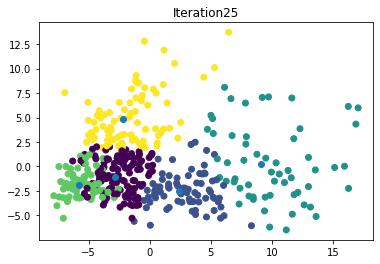

In [69]:
max_iterations = 50  #Number of times the algorithm  will run 
k = 5 # Total number of clusters

centroids = random_centroids(df, k)
old_centroids = pd.DataFrame()
iteration = 10

while iteration < max_iterations and not centroids.equals(old_centroids): 
#iteration < max_iterations if our iteration hits 100 we have to stop the loop or our centroids is equal to our
#old centroids
    old_centroids = centroids
    labels = get_labels(df, centroids) #what cluster each player going into
    centroids = new_centroids(df, labels, k) 
    # update our centroid values based on the geometric mean of all the players assigned to that cluster
    plot_clusters(df, labels, centroids, iteration)
    iteration +=1

In [70]:
centroids

,0,1,2,3,4
FG,2.700616,4.608565,6.945279,1.654374,2.812693
FGA,3.388139,5.678767,7.659042,2.400084,2.868862
FG%,3.695558,3.542873,4.416045,2.685313,5.982539
3P,3.365107,4.906585,4.158428,2.292715,1.500535
3PA,3.573100,5.179699,4.542851,2.609332,1.590091
3P%,4.138430,4.227081,3.941895,3.746803,2.700761
2P,2.235887,3.660409,6.569166,1.636701,3.377683
2PA,2.293103,3.886263,6.470392,1.837710,3.054748
2P%,5.690770,5.008073,5.757580,4.346303,7.072847
eFG%,4.564874,4.207267,4.546692,3.008641,5.786597


In [91]:
player[labels ==2][['Player']+['Pos'] + features].head(50)

,Player,Pos,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
16,Anthony Davis,C,9.3,17.4,0.532,0.3,1.8,0.186,8.9,15.6,...,0.713,2.7,7.2,9.9,3.1,1.2,2.3,2.1,2.4,23.2
17,Anthony Edwards,SG,7.6,17.3,0.441,3.0,8.4,0.357,4.6,8.9,...,0.786,0.9,3.9,4.8,3.8,1.5,0.6,2.6,2.3,21.3
23,Bam Adebayo,C,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
32,Bradley Beal,SG,8.7,19.3,0.451,1.6,5.3,0.300,7.1,14.0,...,0.833,1.0,3.8,4.7,6.6,0.9,0.4,3.4,2.4,23.2
36,Brandon Ingram,SF,8.2,17.9,0.461,1.3,4.1,0.327,6.9,13.8,...,0.826,0.6,5.2,5.8,5.6,0.6,0.5,2.7,2.2,22.7
44,CJ McCollum,SG,8.6,18.8,0.460,2.9,7.6,0.388,5.7,11.2,...,0.682,0.9,3.5,4.3,5.1,1.1,0.4,2.0,2.0,22.1
45,Cade Cunningham,SG,6.7,16.1,0.416,1.8,5.7,0.314,4.9,10.4,...,0.845,0.9,4.6,5.5,5.6,1.2,0.7,3.7,3.1,17.4
57,Chris Paul,PG,5.6,11.3,0.493,1.0,3.1,0.317,4.6,8.3,...,0.837,0.3,4.0,4.4,10.8,1.9,0.3,2.4,2.1,14.7
58,Christian Wood,C,6.5,12.9,0.501,1.9,4.9,0.390,4.5,8.0,...,0.623,1.6,8.5,10.1,2.3,0.8,1.0,1.9,2.5,17.9
71,Damian Lillard,PG,7.7,19.0,0.402,3.2,9.8,0.324,4.5,9.2,...,0.878,0.4,3.7,4.1,7.3,0.6,0.4,2.9,1.3,24.0


Cluster 0 - This category mostly representing by below average players they also shoot very good from the field from and 2 and 3 point line with the highest field goal percentage.

Cluster 1 - is composed of very good role players usually in the starting five they are very good shooters and very good defenders they are a tier behind the all star players


Cluster 2 - Represent the all star players in the league with the highest percentage of assists, Total rebouds, STL, Field goal attempted which might be a representation of a lot play making players meaning they do everything great. 

Cluster 3 - is represented by the players that don't play much at all but still can get some minutes at the end of a game with very low impact 

Cluster 4 - The players in this category are very good rebounders, have the highest 2 point percentage  and block based on these informations we can determine a lot of players in this category are big players meaning centers and Power forward.  



Classify the clusters by the most to the least important:

1 - Cluster 2

2 - Cluster 1

3 - Cluster 4

4- Cluster 0

5 - Cluster 3

In [72]:
kmeans = KMeans(5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [73]:
centroids = kmeans.cluster_centers_

In [74]:
dof = pd.DataFrame(centroids, columns=features).T
dof

,0,1,2,3,4
FG,2.034024,2.644231,7.277644,4.384109,4.239127
FGA,2.775610,2.945109,8.210061,4.186393,5.263050
FG%,3.122241,5.171510,4.208696,6.616247,3.524644
3P,2.779487,2.193684,5.187500,1.810526,5.003738
3PA,3.065089,2.332794,5.570513,1.937247,5.202013
3P%,3.919000,3.755895,4.088687,2.938553,4.250178
2P,1.893491,2.888490,6.692995,5.054945,3.316319
2PA,2.047805,2.727743,6.687500,4.428189,3.515286
2P%,5.061068,6.695811,5.570026,7.382653,5.115659
eFG%,3.710384,5.339838,4.422977,6.393569,4.413680
